# importing packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# importing data

In [2]:
data=pd.read_excel('orders_data.xlsx')

# understanding the data

In [3]:
data.head()

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer


In [4]:
data.describe(include="all")

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
count,171,171,171,171,171,171,171,171.000000,153,145,47,171
unique,171,171,149,81,30,54,61,NaN,18,13,1,2
top,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Geetika,"MUMBAI,",MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,NaN,₹449.00,₹84.96,Cash On Delivery,Delivered to buyer
freq,1,1,3,17,31,33,33,NaN,52,100,47,160
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.087719,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.445132,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_no      171 non-null    object
 1   order_date    171 non-null    object
 2   buyer         171 non-null    object
 3   ship_city     171 non-null    object
 4   ship_state    171 non-null    object
 5   sku           171 non-null    object
 6   description   171 non-null    object
 7   quantity      171 non-null    int64 
 8   item_total    153 non-null    object
 9   shipping_fee  145 non-null    object
 10  cod           47 non-null     object
 11  order_status  171 non-null    object
dtypes: int64(1), object(11)
memory usage: 16.2+ KB


In [6]:
[features for features in data.columns if data[features].isnull().sum()>0]

['item_total', 'shipping_fee', 'cod']

# Data cleaning

In [7]:
# removing comma from city and state and make it upper case
locations = ['ship_city', 'ship_state']
for i in locations:
    data[i] = data[i].apply(lambda x: x.replace(',', '').upper())

In [8]:
data["buyer"]= data["buyer"].apply(lambda x: x.upper())

In [9]:
data["sku"] = data["sku"].apply(lambda x: x[5:])
data["sku"]=data["sku"].str.replace('-',"")
data["sku"]=data["sku"].apply(lambda x: x.replace(' ', ''))

In [10]:
# remove rupee symbol and commas from amount features
amounts = ['item_total', 'shipping_fee']
for i in amounts:
    data[i]=pd.to_numeric(data[i].str.replace(',',"").str.extract(r'([\d]+\.[\d]+)')[0])

In [11]:
data.isnull()

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
166,False,False,False,False,False,False,False,False,False,False,False,False
167,False,False,False,False,False,False,False,False,False,False,True,False
168,False,False,False,False,False,False,False,False,False,False,True,False
169,False,False,False,False,False,False,False,False,False,False,False,False


# Data imputation

In [12]:
#The method of payment should be cash on delivery otherwise online.
data["cod"].fillna("Online",inplace=True)

<AxesSubplot:>

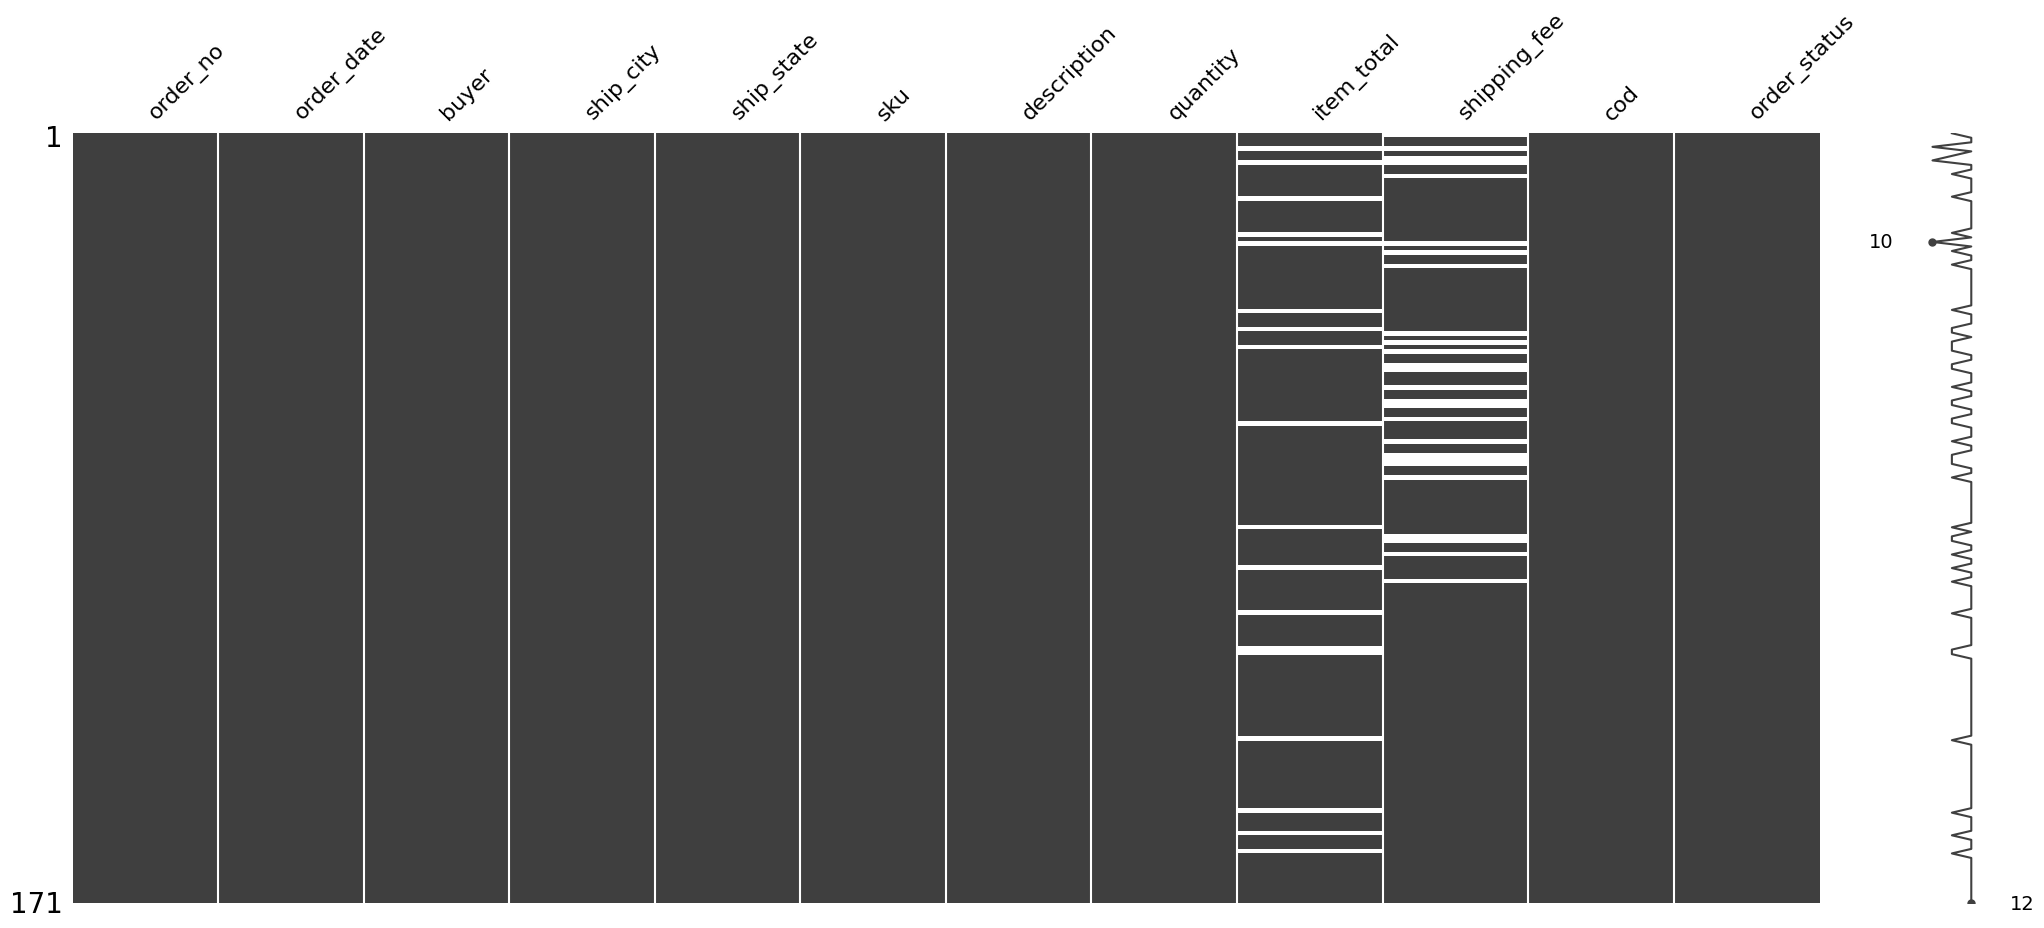

In [13]:
#There are still some null values in item_total and shipping_fee
msno.matrix(data)

In [14]:
# impute missing values via simpleImputer by using strategy=median
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy="median",)
data[['item_total', 'shipping_fee']]=imputer.fit_transform(data[['item_total', 'shipping_fee']])

<AxesSubplot:>

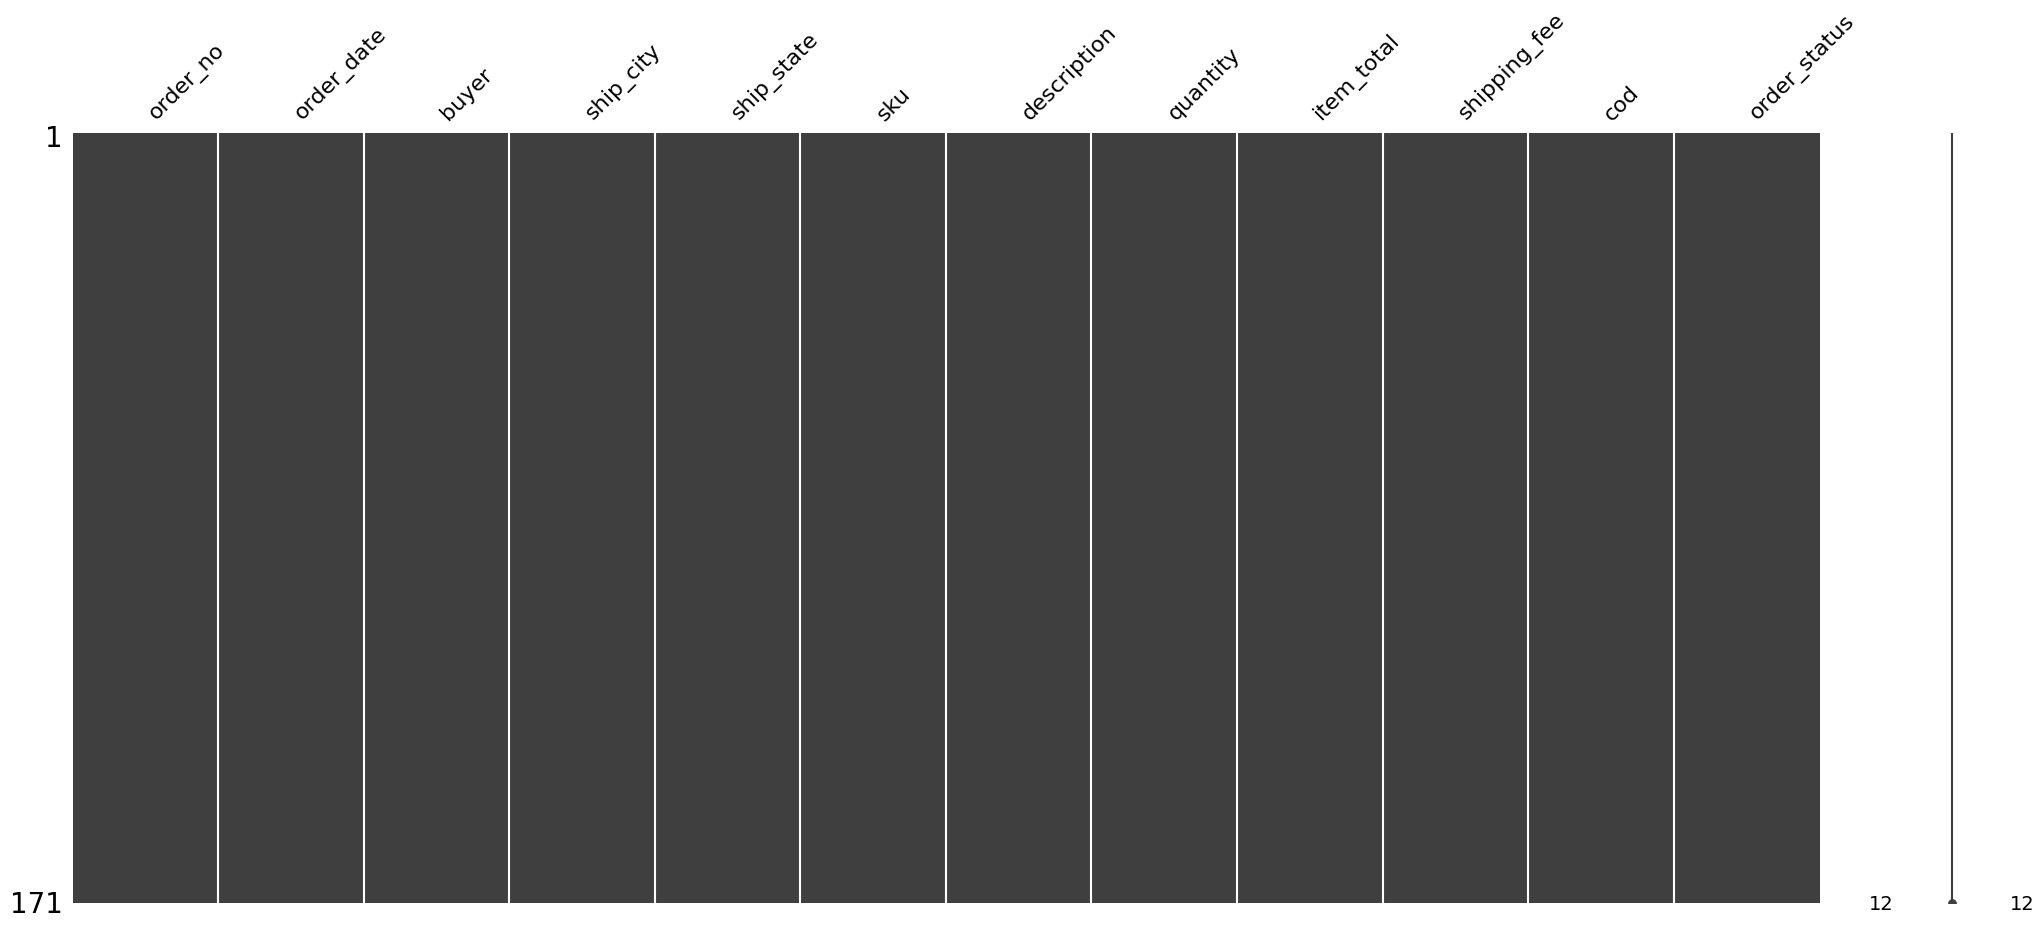

In [15]:
msno.matrix(data)

In [16]:
data

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",MR.,CHANDIGARH,CHANDIGARH,2X3C0FKNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,84.96,Online,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",MINAM,PASIGHAT,ARUNACHAL PRADESH,DN0WDXVYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,Online,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",YATIPERTIN,PASIGHAT,ARUNACHAL PRADESH,DN0WDXVYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,Online,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",ACIYA,DEVARAKONDA,TELANGANA,AHJ3AOR7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,449.0,84.96,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",SUSMITA,MUMBAI,MAHARASHTRA,KL7WAAZ82I,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.0,84.96,Online,Delivered to buyer
...,...,...,...,...,...,...,...,...,...,...,...,...
166,171-2829978-1258758,"Mon, 13 Dec, 2021, 11:30 am IST",SHAHIN,MUMBAI,MAHARASHTRA,DN0WDXVYOT,Women's Set of 5 Multicolor Pure Leather Singl...,3,1347.0,84.96,Cash On Delivery,Delivered to buyer
167,402-3045457-5360311,"Wed, 1 Dec, 2021, 12:18 pm IST",SHARMISTHA,DEHRADUN,UTTARAKHAND,SBWDQNSDN9,Traditional Block-Printed Women's 100% Pure Le...,1,1299.0,114.46,Online,Delivered to buyer
168,408-2260162-8323567,"Thu, 9 Dec, 2021, 6:55 pm IST",SHASHANK,DURG,CHHATTISGARH,SBWDQNSDN9,Traditional Block-Printed Women's 100% Pure Le...,1,1299.0,105.02,Online,Delivered to buyer
169,403-5664951-8941100,"Wed, 23 Feb, 2022, 12:43 am IST",JAYETA,KOLKATA,WEST BENGAL,N8YFZFP74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,1499.0,80.24,Cash On Delivery,Delivered to buyer


In [17]:
#Data cleaning is done

# Exploratory Analysis of Data

In [18]:
data.describe(include="all")

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
count,171,171,171,171,171,171,171,171.000000,171.000000,171.000000,171,171
unique,171,171,147,74,26,54,61,NaN,NaN,NaN,2,2
top,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",GEETIKA,MUMBAI,MAHARASHTRA,DN0WDXVYOT,Women's Set of 5 Multicolor Pure Leather Singl...,NaN,NaN,NaN,Online,Delivered to buyer
freq,1,1,3,20,32,33,33,NaN,NaN,NaN,124,160
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.087719,568.766082,84.780585,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.445132,463.371967,24.447241,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,175.000000,47.200000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,399.000000,84.960000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,449.000000,84.960000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,475.000000,84.960000,NaN,NaN


# sale vs state

<AxesSubplot:title={'center':'total quantity of sales by states'}, xlabel='quantity', ylabel='ship_state'>

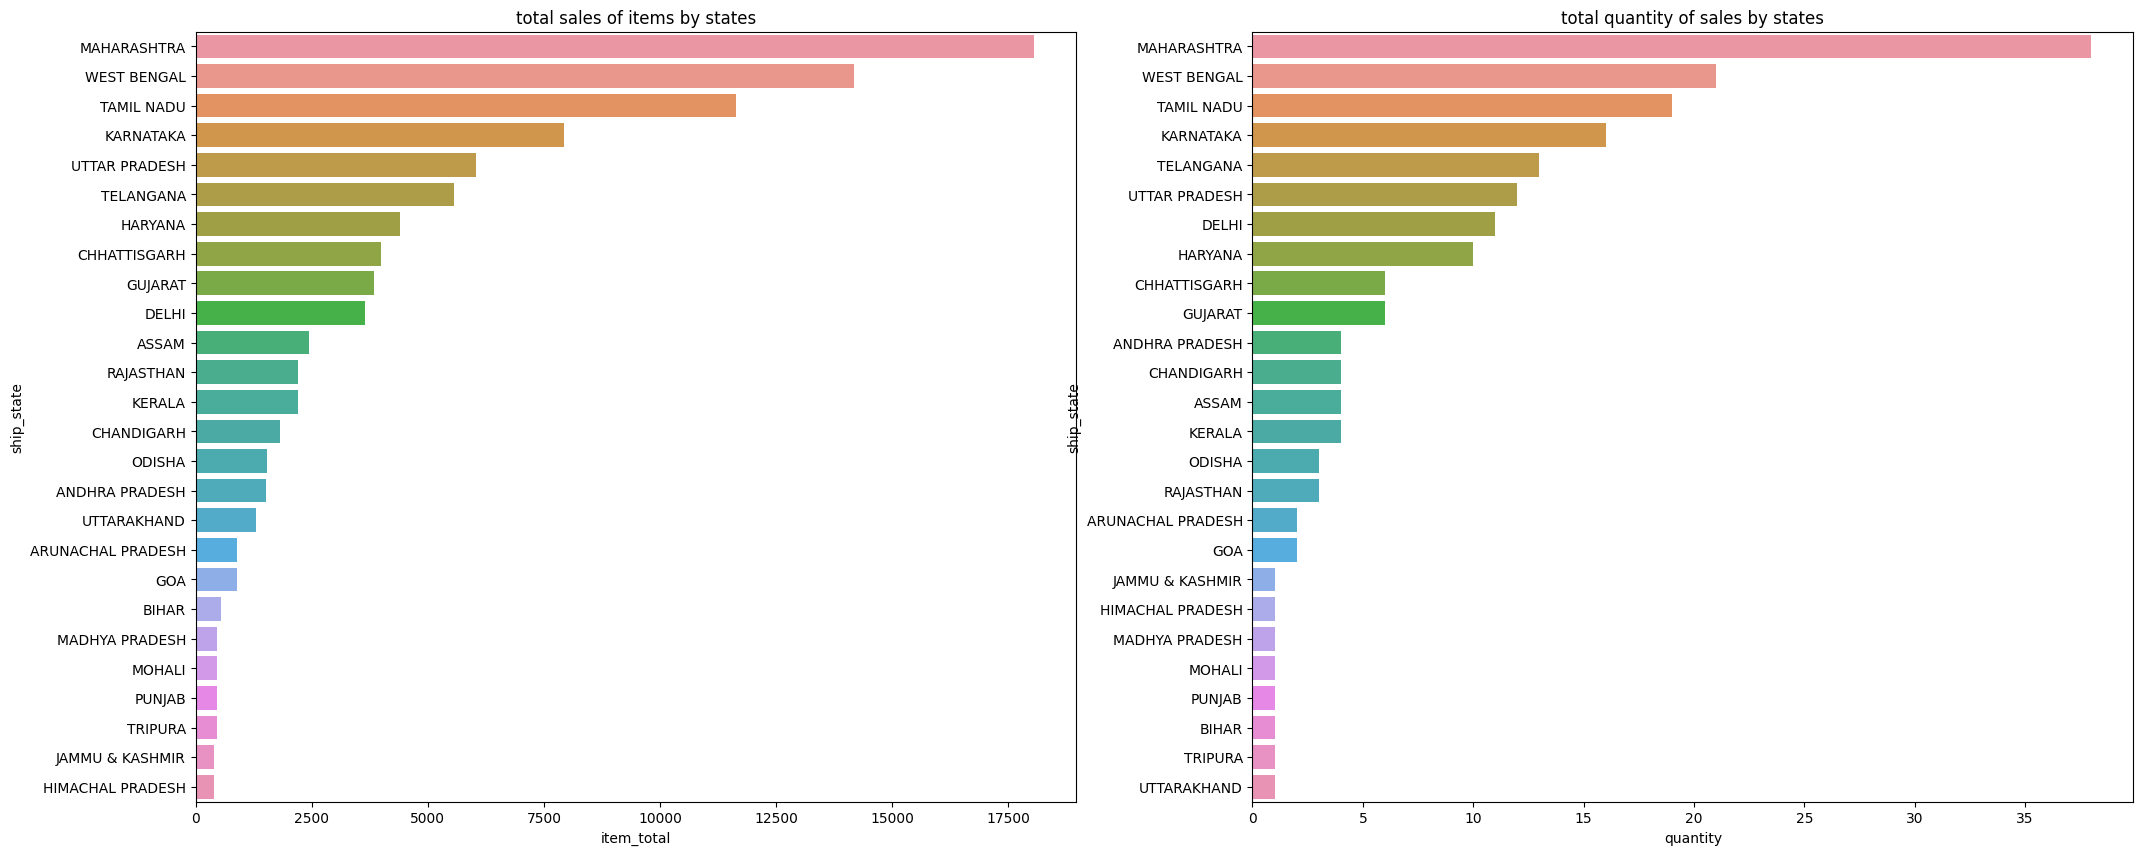

In [19]:
#Sales based on cities and states
plt.figure(figsize=(25,10))

ax1 = plt.subplot(1, 2, 1)
plt.title("total sales of items by states")
data_ship_state=data.groupby("ship_state").aggregate("sum").sort_values("item_total",ascending=False)
sns.barplot(y=data_ship_state.index,x=data_ship_state["item_total"])

ax2 = plt.subplot(1,2,2)
plt.title("total quantity of sales by states")
data_ship_state=data.groupby("ship_state").aggregate("sum").sort_values("quantity",ascending=False)
sns.barplot(y=data_ship_state.index,x=data_ship_state["quantity"])

In [20]:
data.head(2)

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",MR.,CHANDIGARH,CHANDIGARH,2X3C0FKNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,84.96,Online,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",MINAM,PASIGHAT,ARUNACHAL PRADESH,DN0WDXVYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,Online,Delivered to buyer


# Sales vs Payment Method and Returned to Seller

In [21]:
data_hist=data[['cod', 'order_status', 'item_total']].groupby(['cod', 'order_status']).sum().reset_index()
data_hist

,cod,order_status,item_total
0,Cash On Delivery,Delivered to buyer,23812.0
1,Cash On Delivery,Returned to seller,2245.0
2,Online,Delivered to buyer,68508.0
3,Online,Returned to seller,2694.0


<AxesSubplot:xlabel='cod', ylabel='item_total'>

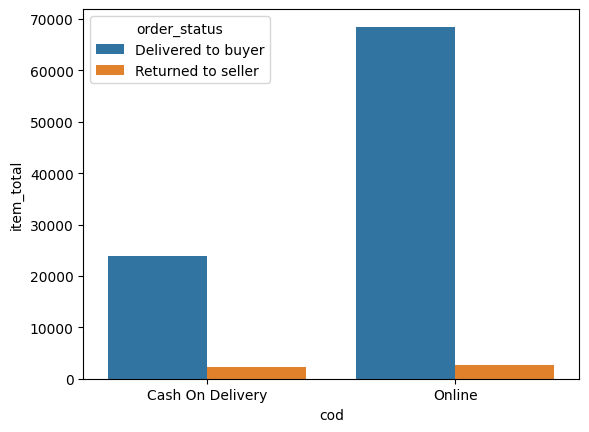

In [22]:
sns.barplot(data=data_hist,x="cod",y="item_total",hue="order_status",)

In [23]:
print("The percentage of returned to seller for Online Sales")
print("{:.2f} %".format(data_hist.loc[3,"item_total"]/data_hist.loc[2,"item_total"]*100))
print("The percentage of returned to seller for Cash on Delivery")
print("{:.2f} %".format(data_hist.loc[1,"item_total"]/data_hist.loc[0,"item_total"]*100))

The percentage of returned to seller for Online Sales
3.93 %
The percentage of returned to seller for Cash on Delivery
9.43 %


# Payment Method vs Shipping Fee

In [24]:
data_hist=data[['cod', 'shipping_fee','quantity']].groupby(['cod']).sum().reset_index()
data_hist["fee per quantity"]=data_hist["shipping_fee"]/data_hist["quantity"]
data_hist

,cod,shipping_fee,quantity,fee per quantity
0,Cash On Delivery,3904.62,49,79.686122
1,Online,10592.86,137,77.320146


# SKU and Buyer vs Returned to Seller

<AxesSubplot:xlabel='count', ylabel='sku'>

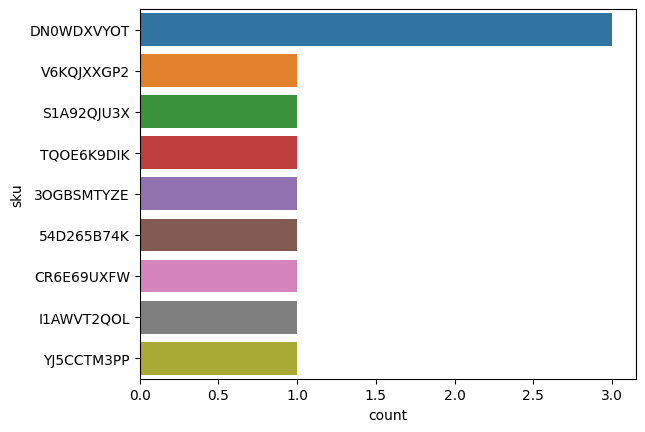

In [25]:
#Lets check is there any relation with specific buyers or sku's with returned to seller
data_sku=data.groupby(['sku','order_status']).agg({'order_status':'count',})
data_sku.rename(columns={"order_status":"count"},inplace=True)
data_sku.sort_values(by="count",ascending=False,inplace=True)
data_sku.reset_index(inplace=True)
data_sku_returned=data_sku.loc[data_sku['order_status']=='Returned to seller',:]
sns.barplot(data=data_sku_returned,y="sku",x="count")

In [26]:
# Check specifically SKU: DN0WDXVYOT
data_one_sku=data.loc[data["sku"]=="DN0WDXVYOT",:]
data_one_sku=data_one_sku.groupby(['sku','order_status']).agg({'order_status':'count',})
data_one_sku.rename(columns={"order_status":"count"},inplace=True)
data_one_sku.reset_index(inplace=True)
print(data_one_sku)

returned=int(data_one_sku.loc[data_one_sku["order_status"]=="Returned to seller","count"])
delivered=int(data_one_sku.loc[data_one_sku["order_status"]=="Delivered to buyer","count"])

print("Returned / Delivered ratio : {:.2f} %".format(returned/delivered*100))

          sku        order_status  count
0  DN0WDXVYOT  Delivered to buyer     30
1  DN0WDXVYOT  Returned to seller      3
Returned / Delivered ratio : 10.00 %


# Correlation Analysis¶

In [27]:
data["cod"]=data["cod"].map({"Online": 0, "Cash On Delivery":1})
data["order_status"]=data["order_status"].map({"Returned to seller": 0, "Delivered to buyer":1})

<AxesSubplot:>

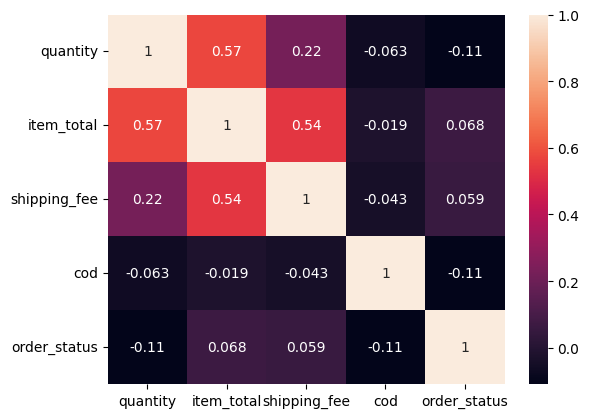

In [28]:
feature_of_interest=["quantity","item_total","shipping_fee","cod","order_status"]
sns.heatmap(data[feature_of_interest].corr(),annot=True)

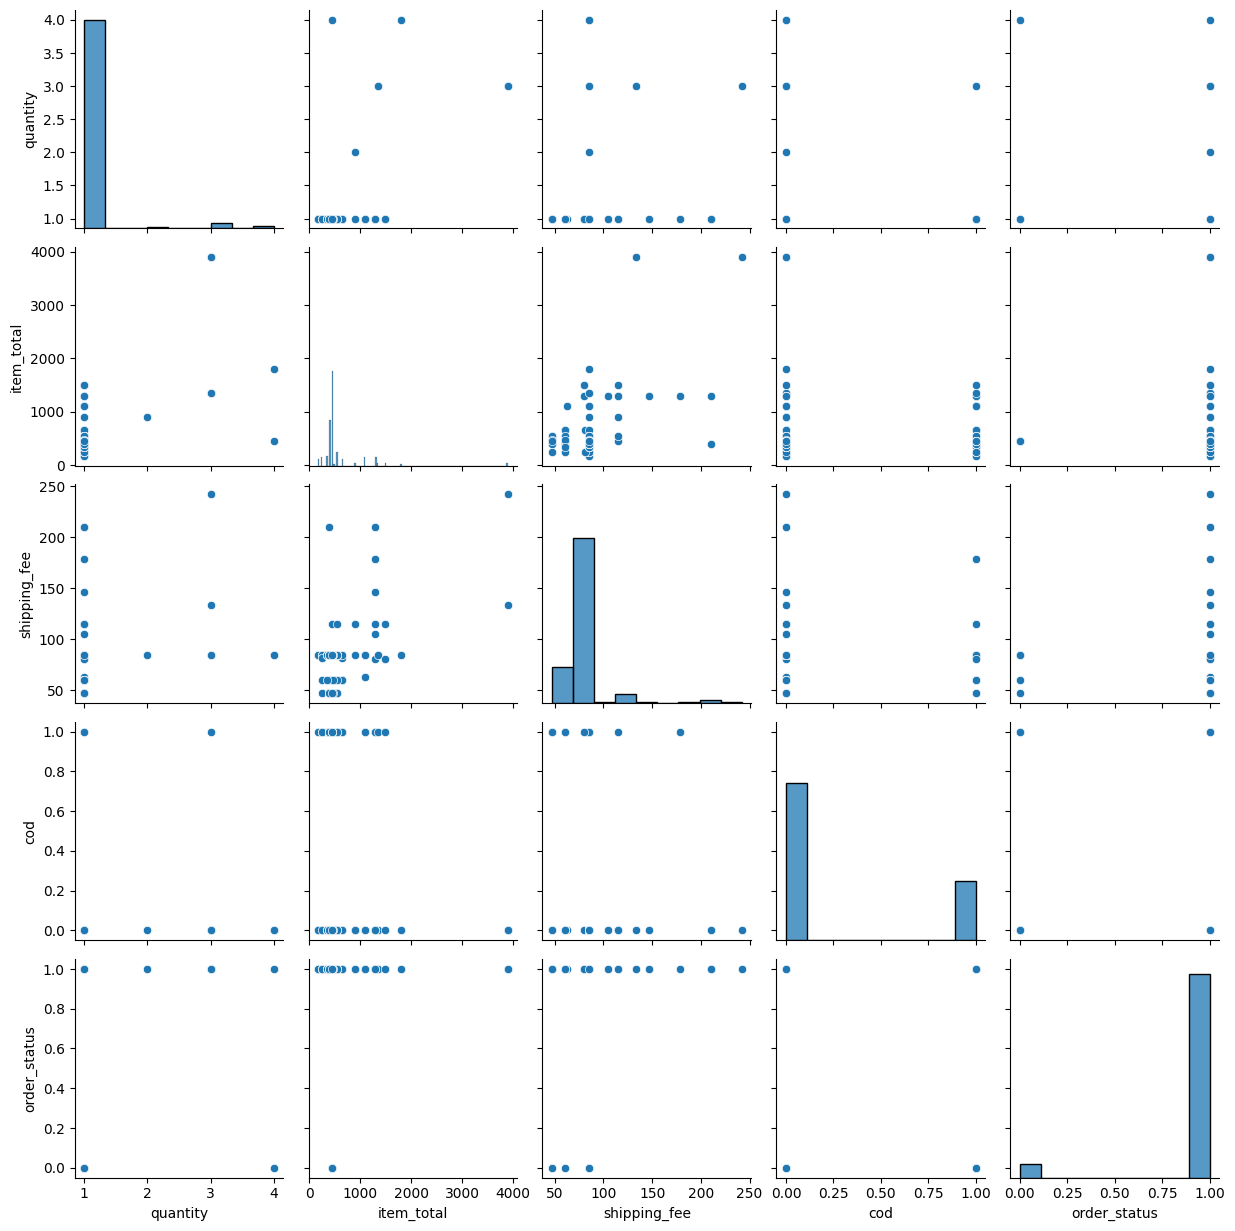

In [29]:
sns.pairplot(data[feature_of_interest])

In [30]:
data.head(2)

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",MR.,CHANDIGARH,CHANDIGARH,2X3C0FKNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,84.96,0,1
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",MINAM,PASIGHAT,ARUNACHAL PRADESH,DN0WDXVYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,0,1


# Classification Models

In [31]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
feature_of_interest=["quantity","item_total","shipping_fee","cod","order_status"]
classification_data=data[feature_of_interest].copy()
X=classification_data.iloc[:,:-1]
y=classification_data.iloc[:,-1]  # order status

In [33]:
sc= StandardScaler()
X=sc.fit_transform(X)


In [34]:
classifiers=[RandomForestClassifier()]
for classifier in classifiers:
    accuracies = cross_val_score(estimator = classifier, X = X, y = y, cv = 5)
    print (classifier)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print("")

RandomForestClassifier()
Accuracy: 91.82 %
Standard Deviation: 1.16 %

